In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import cv2
#from skimage.transform import resize

from vis_utils import vis_pair, vis_hists, vis_image
from matrix_utils import arr_info, make_linmap, preprocess_img, normalize_ubyte
from landmark_utils import *

from LandmarkTester import LandmarkTester

In [2]:
#IMAGE = 'meei1.jpg'
IMAGE = 'test7.png'
#IMAGE = 'stough1.jpg'
#IMAGE = 'mir2.jpg'

patient_img = cv2.imread('./test_img/' + IMAGE)
model_to_use = 'MEE' #'MEE' or 'iBUG'

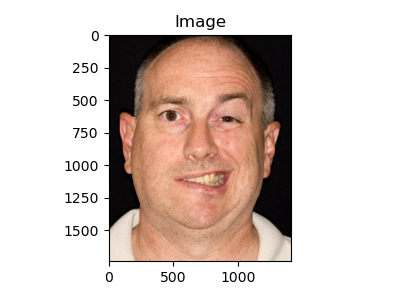

In [3]:
I = plt.imread('./test_img/' + IMAGE)
#I = np.rot90(np.rot90(np.rot90(I)))

vis_image(I)

In [4]:
arr_info(I)


((1741, 1410, 4), dtype('float32'), 0.0, 1.0)

In [5]:
test_old = LandmarkTester(patient_img, model_to_use)

Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 4.62 sec
((1741, 1410, 3), dtype('uint8'), 0, 255)
((68, 2), dtype('int16'), 232, 1484)


In [6]:
test = LandmarkTester(patient_img, model_to_use, 400)

Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 3.59 sec
((1741, 1410, 3), dtype('uint8'), 0, 255)
((68, 2), dtype('int16'), 232, 1492)


In [7]:
%%time
#test.test_random_rotation(rand_angle=7, num_test=30, rand_mode='normal')
#test.test_fixed_rotation(test_angle=10, num_steps=50)
#test.test_no_rotation(num_test=10)
#test.test_intensities(intensity_range=(-20, 20), num_test=50)

#test.test_intensities(scale=50, num_test=20)
#test.test_intensities(scale=50, num_test=20)
#test.test_noises(scale=20, dist='normal', num_test=30, per_channel=True)

test.test_combined(rand_angle=10, scale=15, num_test=50, rand_mode='normal')

Testing 50 rotations & noises...
===== Tests Started! =====
Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
One test has completed...
Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
One test has completed...
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
One test has completed...
Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is close

In [8]:
test._xy_dist.shape

(68, 2, 50)

In [9]:
# Transposed points
points = test._xy_dist
#points[0]

In [10]:
which_points = np.arange(points.shape[0])
#which_points = [0,19,24,36,39,42,45,48,51,54,57,8]

which_points

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [11]:
params = test._test_params

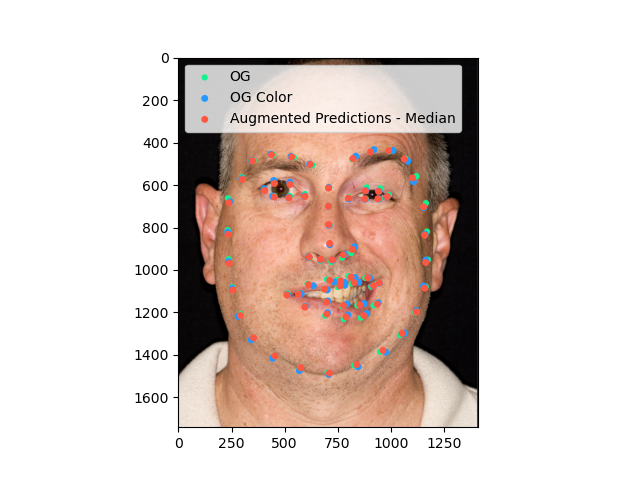

In [14]:
plt.figure()

implot = plt.imshow(I)
ax = plt.gca()

# Bad lms
bad_points = np.transpose(test_old._og_landmarks)
plt.scatter(x=bad_points[0], y=bad_points[1], c='#12f290', s=20, alpha=1, edgecolor='none')

# OG points
og_points = np.transpose(test._og_landmarks)
plt.scatter(x=og_points[0], y=og_points[1], c='#2599ff', s=25, alpha=1, edgecolor='none')

# Median points
plt.scatter(x=np.median(points, axis=2)[...,0], y=np.median(points, axis=2)[...,1], c='#ff5742', s=25, alpha=1, edgecolor='none')


# Mean points
'''
for i in which_points:
    plt.scatter(x=np.mean(points[i,0]), y=np.mean(points[i,1]), c='#fa0fdb', s=20, alpha=1, edgecolor='none')
'''

"""
# Test points
for i in which_points:
    #plt.scatter(x=points[i,0], y=points[i,1], c=params, cmap='bwr', s=10, alpha=1, edgecolor='none')
    plt.scatter(x=points[i,0], y=points[i,1], c='blue',s=10, alpha=0.25, edgecolor='none')
"""

# Labels
#ax.legend(loc='upper left',labels=['Augmented Predictions'])
ax.legend(loc='upper left',labels=['OG','OG Color', 'Augmented Predictions - Median'])

plt.show()